In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # the quadratic equation


Text(0, 0.5, 'y')

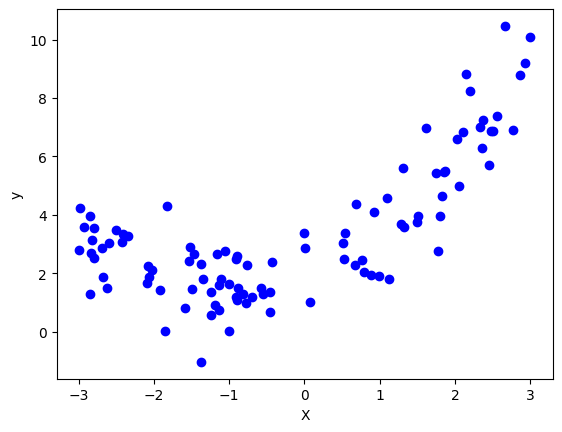

In [5]:
plt.scatter(X, y,color='b')
plt.xlabel("X")
plt.ylabel("y")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)



In [9]:
from sklearn.metrics import r2_score, mean_squared_error
print("Linear Regression R2 Score:", r2_score(y_test, y_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

Linear Regression R2 Score: 0.45613449839796816
Linear Regression MSE: 2.317971723982314


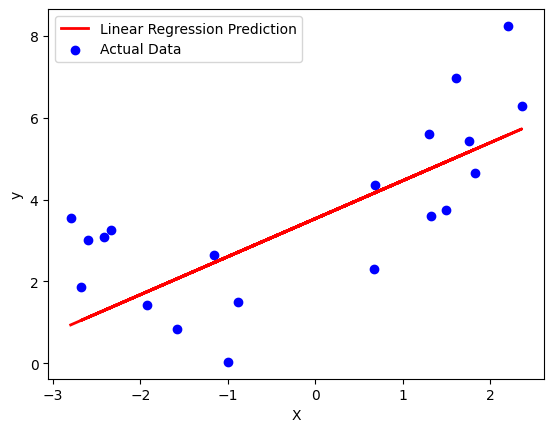

In [10]:
plt.plot(X_test, y_pred, color='r', linewidth=2, label='Linear Regression Prediction')
plt.scatter(X_test, y_test, color='b', label='Actual Data')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_poly_pred = poly_reg.predict(X_poly_test)
print("Polynomial Regression R2 Score:", r2_score(y_test, y_poly_pred))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_poly_pred))



Polynomial Regression R2 Score: 0.7367239033423773
Polynomial Regression MSE: 1.1220909321425587


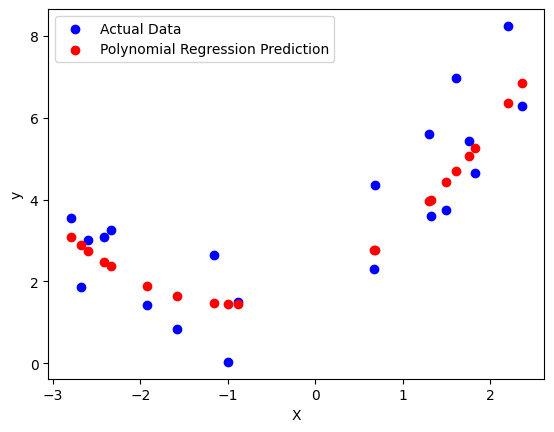

In [12]:
plt.scatter(X_test, y_test, color='b', label='Actual Data')
plt.scatter(X_test, y_poly_pred, color='r', label='Polynomial Regression Prediction')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
print("Polynomial Regression Coefficients:", poly_reg.coef_, poly_reg.intercept_)   # coeff of [x ,x^2 ,x^3 ..]

Linear Regression Coefficients: [[0.94545858 0.49088437]] [1.90247743]


In [20]:
# Pipeline approach
from sklearn.pipeline import Pipeline


In [27]:
def poly_regression(degree):
    X_new=np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    poly_pipeline=Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_pipeline.fit(X_train, y_train)
    y_new_pred = poly_pipeline.predict(X_new)

    plt.plot(X_new, y_new_pred, color='r', label=f'Polynomial Degree {degree}')
    plt.scatter(X_train, y_train, color='b', label='Actual Data')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.axis([-3, 3, 0, 10])
    plt.show()





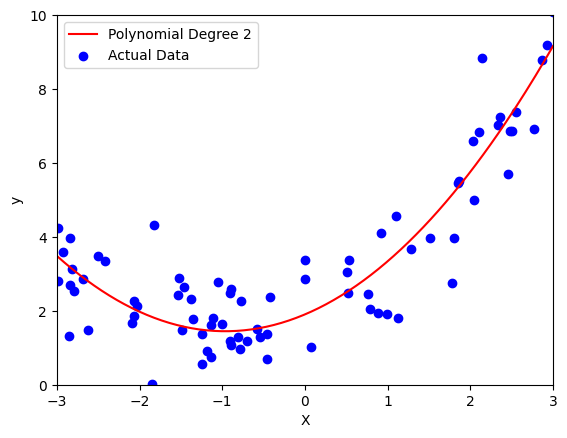

In [34]:
poly_regression(degree=2)